In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("C:/Users/ZEAL INSTITUTE/Desktop/AI and Data Science/PYTHON/Kaggle Machine Learning Case studies/home-data-for-ml-course/train.csv")

In [4]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.shape

(1460, 81)

In [7]:
series = df.isnull().sum().sort_values(ascending=False)
series[:20]
df.drop(['PoolQC','MiscFeature','Alley','Fence','Id'],axis=1,inplace=True)

In [8]:
#Sales Price analysis

In [9]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\ZEAL INSTITUTE\AppData\Local\Temp\ipykernel_6208\4043413929.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

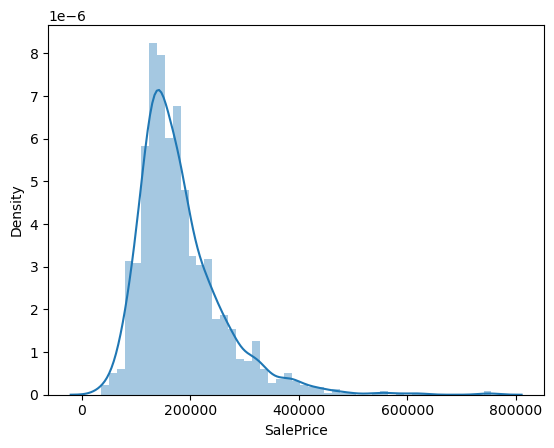

In [10]:
#Distribution
sns.distplot(df['SalePrice'])

In [11]:
# Skewness and Kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [12]:
num = []

for i in df.columns:
    if (df[i].dtype =='int64') or (df[i].dtype =='float64'):
        num.append(i)
num.remove('SalePrice')
print(num)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [13]:
cat = []

for i in df.columns:
    if (df[i].dtype =='object'):
        cat.append(i)
print (cat)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


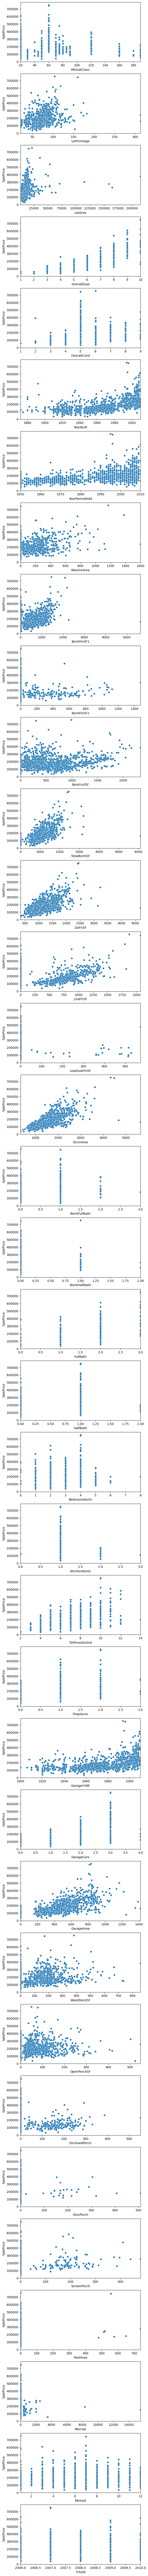

In [14]:
#Num features scatterplot vs SalesPrice

fig,ax = plt.subplots(len(num),1,figsize = (7,150))
for index,column in enumerate (num):
    sns.scatterplot(data=df,x=column,y='SalePrice',ax=ax[index])
    #ax[index].set_title(column)
    ax[index].set_xlim(min(df[column]),max(df[column]))


plt.show()

#From the above we can conclude 'SalesPrice' depends on following num
//
LotFrontage
OverallQual
TotalBsmt
GrLivArea
TotalRmsAbvGrd
GarageCars
GarageArea
//

C:\Users\ZEAL INSTITUTE\AppData\Local\Temp\ipykernel_6208\2926288863.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

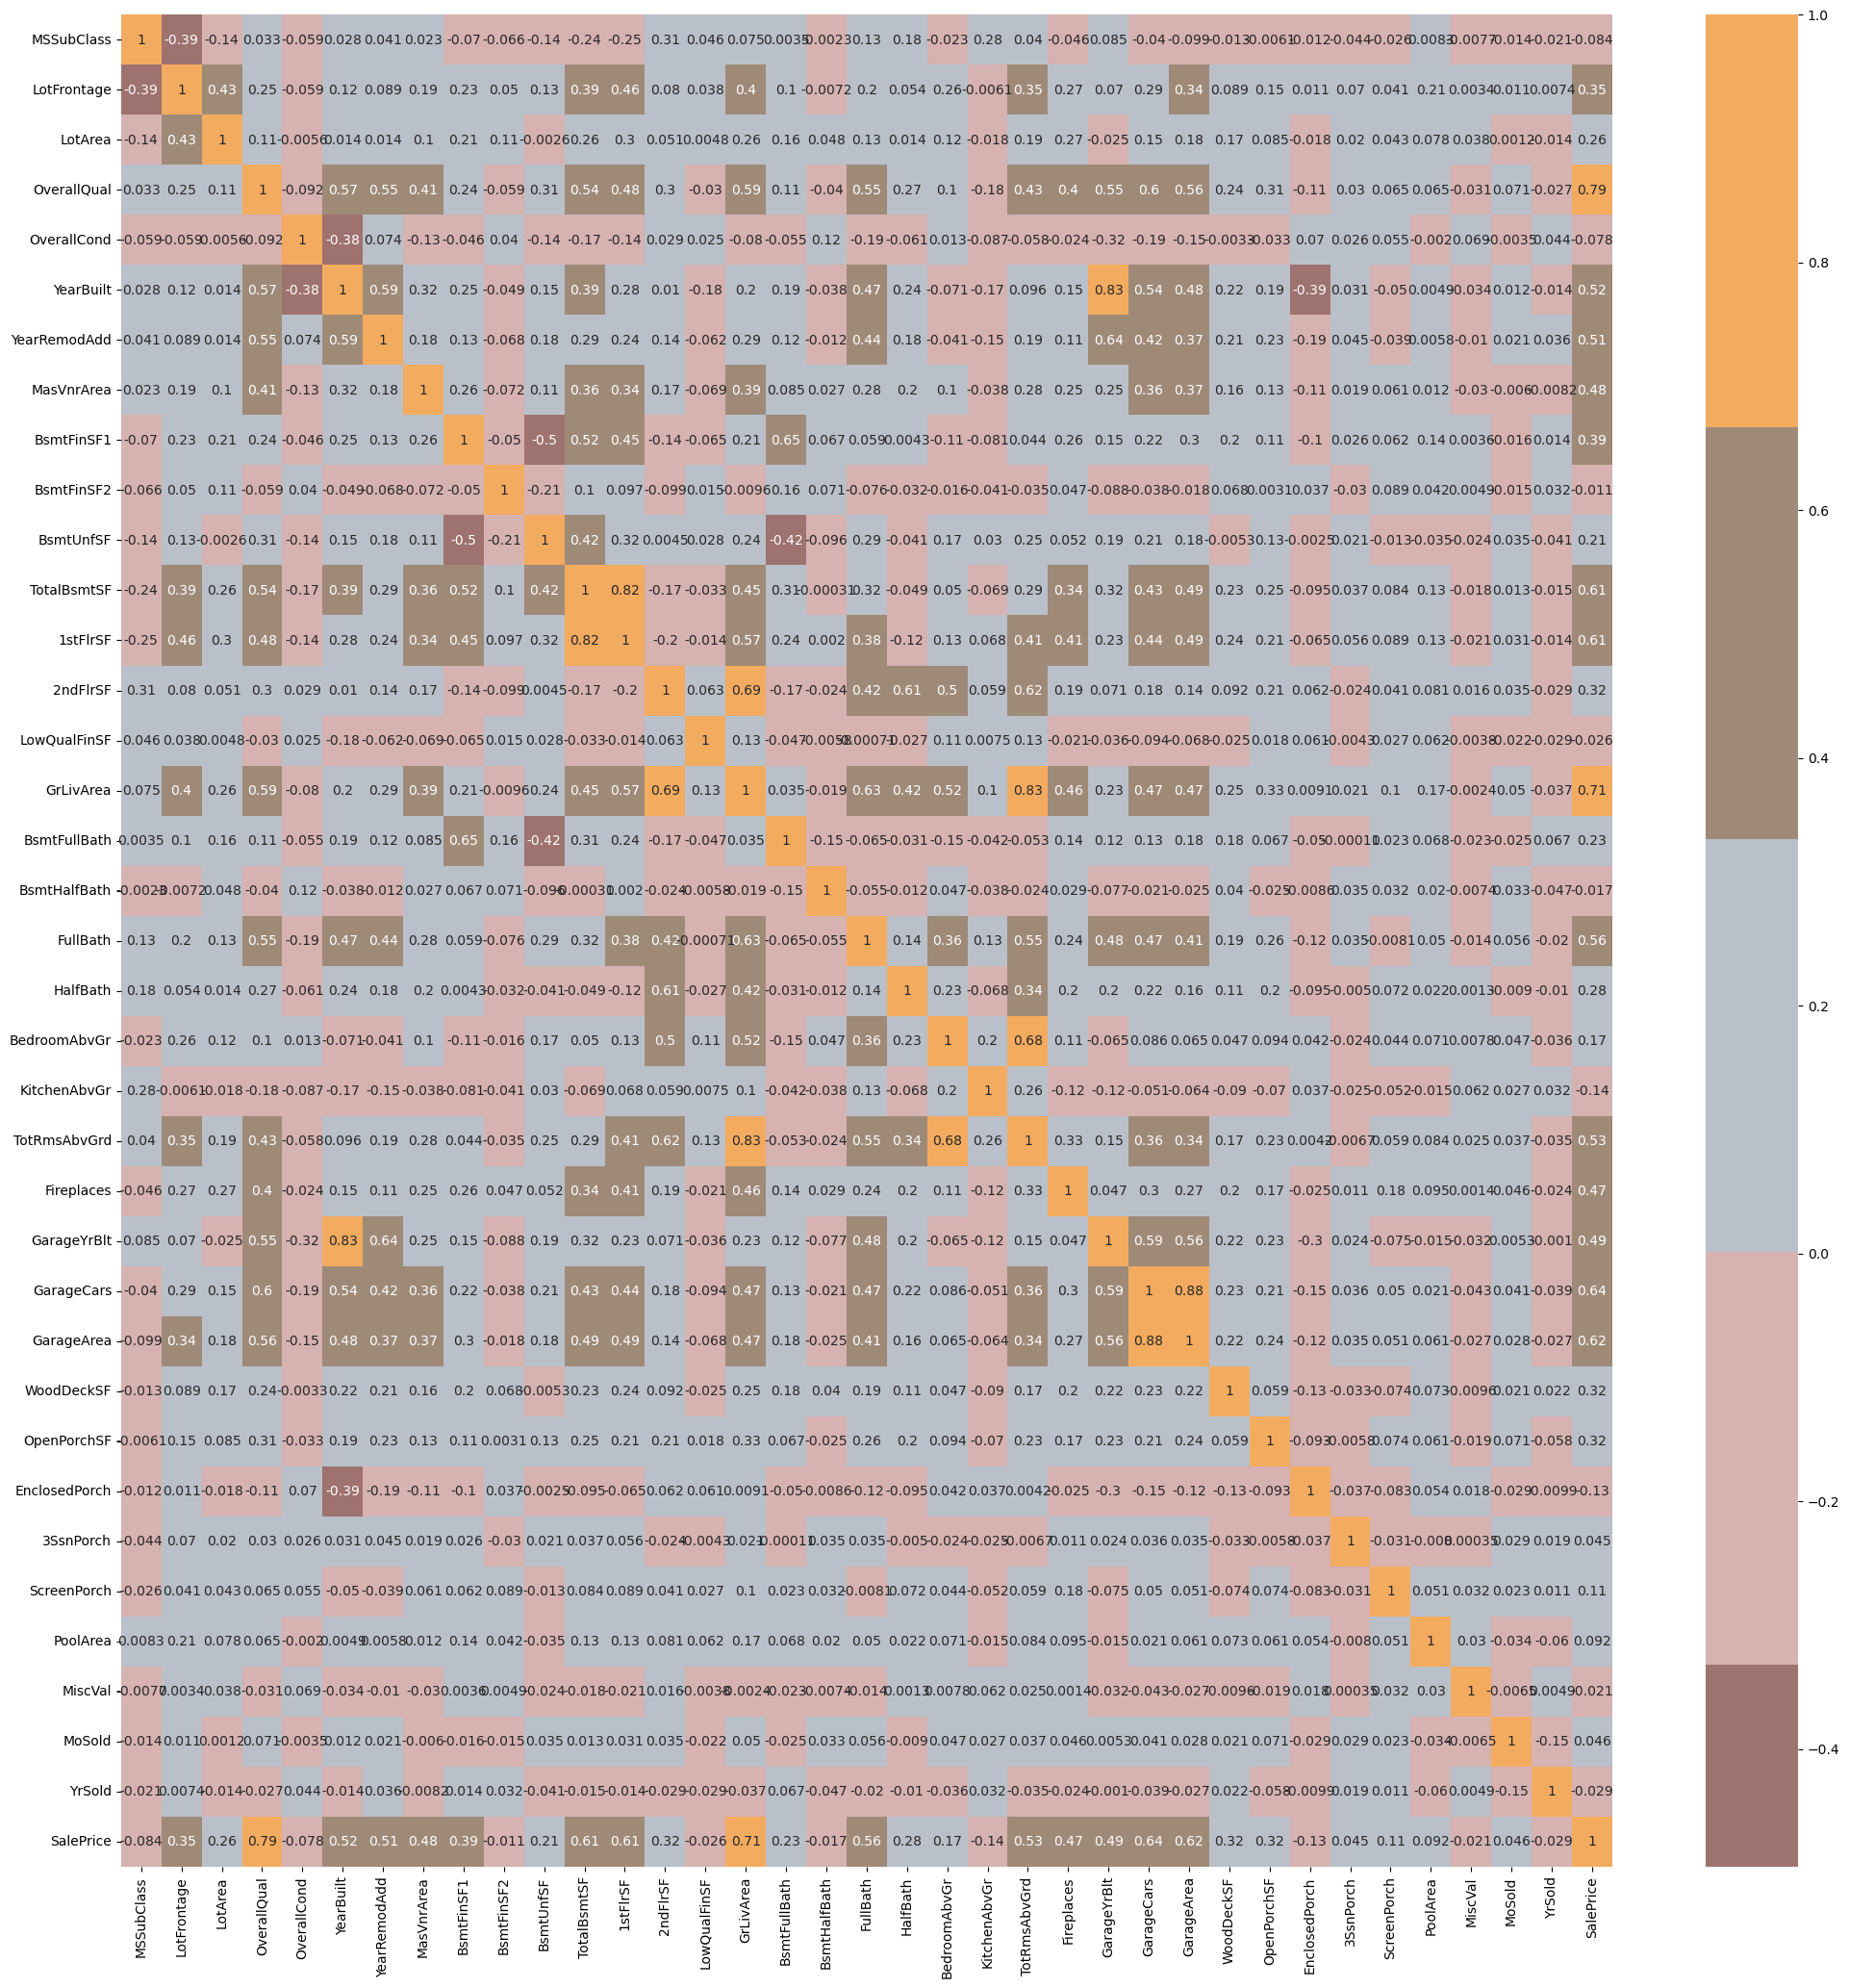

In [15]:
#Correlation matrix

from matplotlib import colors
corr = df.corr()
plt.figure(figsize=(25,25))
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
sns.heatmap(corr,annot=True,cmap=cmap,center=0)


<Axes: >

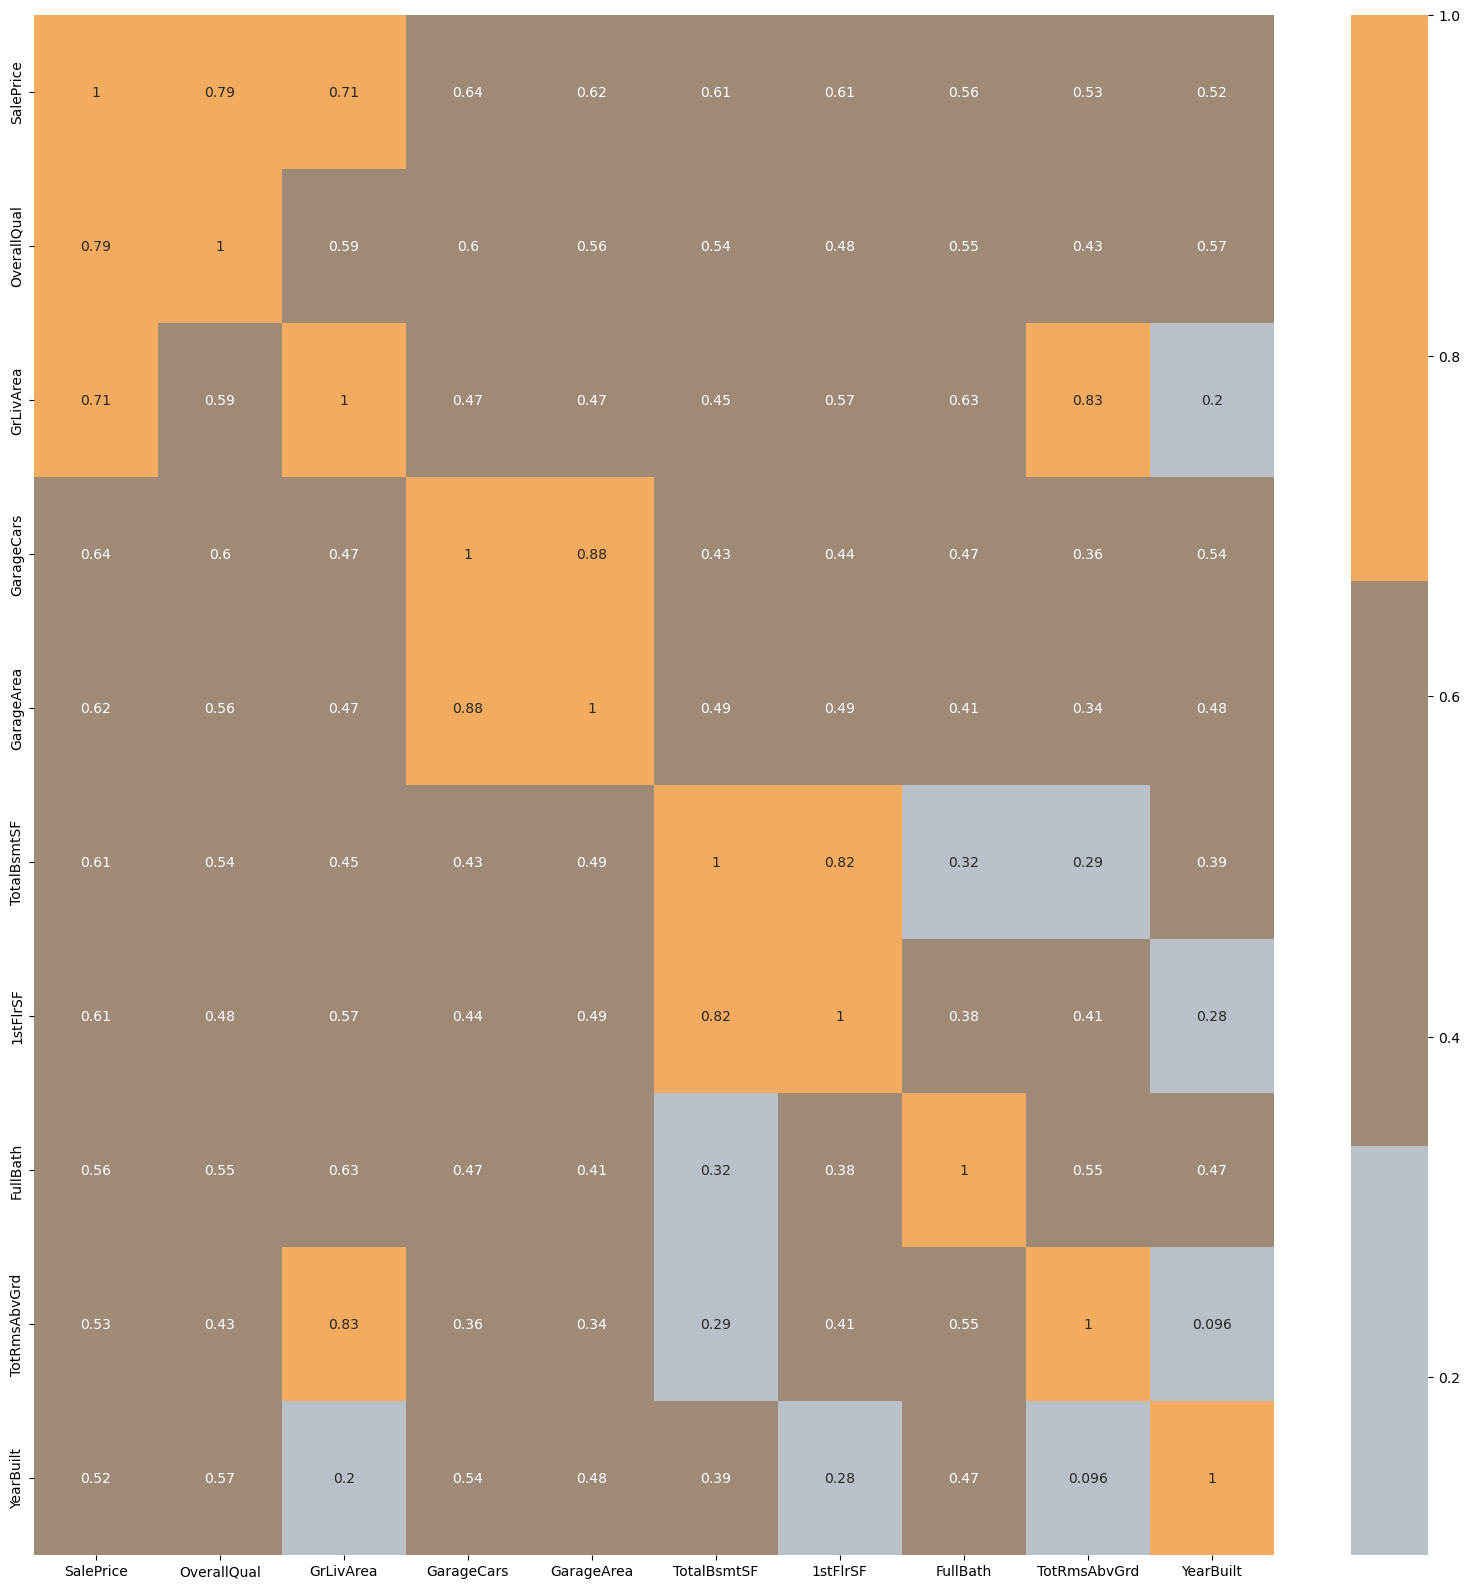

In [16]:
#N largest correlations
top_10 = corr.nlargest(10,'SalePrice')
col = top_10.index
newdf = df[col]
new_corr = newdf.corr()
plt.figure(figsize=(20,20))

cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
sns.heatmap(new_corr,annot=True,cmap=cmap,center=0)

On a closer analysis we find these columns are most appropriate SalePrice
'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'

After removing redundant colums we can come up with 

['OverallQual', 'GrLivArea', 'GarageCars',
'TotalBsmtSF', 'FullBath','YearBuilt']

In [17]:
#Categorical variables

In [18]:
for c in cat:
    df[c] = df[c].astype('category')
    if df[c].isnull().any():
        df[c] = df[c].cat.add_categories(['Missing'])
        df[c] = df[c].fillna('Missing')
        
    

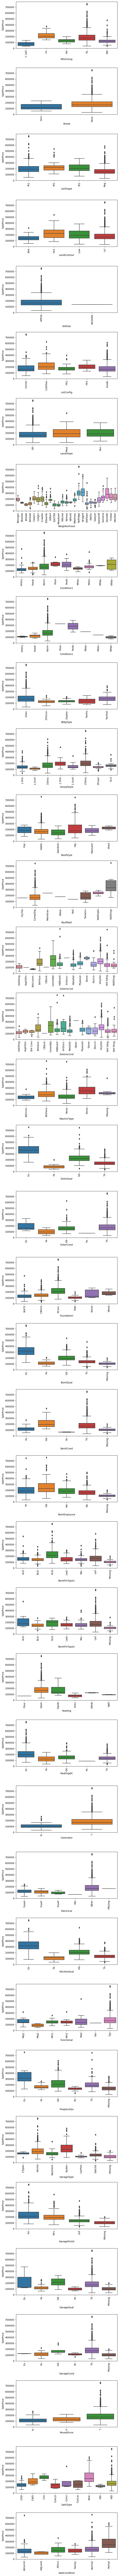

In [19]:
#Cat features boxplot
fig,ax = plt.subplots(len(cat),1,figsize = (7,150))
for index,column in enumerate (cat):
    sns.boxplot(data=df,x=column,y='SalePrice',ax=ax[index])
    ax[index].set_xticklabels(ax[index].get_xticklabels(), rotation=90)
    #ax[index].set_title(column)
    #ax[index].set_xlim(0,max(df[column]))
plt.tight_layout()
plt.show()

In [20]:
#Anova one way test:
from scipy.stats import f_oneway

a_test = pd.DataFrame()
a_test.index = cat
p_value = []
for index in cat:
    SalesData = df.groupby(index)['SalePrice'].apply(list)
    AnovaResult = f_oneway(*SalesData)
    if (AnovaResult[1]<0.05):
        p_value.append(np.log(1/AnovaResult[1]))
    else:
        p_value.append(0)
      
a_test['disparity'] = p_value
a_test.sort_values('disparity',ascending=False,inplace=True)



In [21]:
#KendallTau test

from scipy.stats import kendalltau
col_list = []
for column in cat:
    coef,p_value = kendalltau(df[c],df['SalePrice'])
    if (p_value<0.05):
        col_list.append(cat)
        print (f'P-value for {column} is significant ' ,p_value)


P-value for MSZoning is significant  3.799776694815118e-35
P-value for Street is significant  3.799776694815118e-35
P-value for LotShape is significant  3.799776694815118e-35
P-value for LandContour is significant  3.799776694815118e-35
P-value for Utilities is significant  3.799776694815118e-35
P-value for LotConfig is significant  3.799776694815118e-35
P-value for LandSlope is significant  3.799776694815118e-35
P-value for Neighborhood is significant  3.799776694815118e-35
P-value for Condition1 is significant  3.799776694815118e-35
P-value for Condition2 is significant  3.799776694815118e-35
P-value for BldgType is significant  3.799776694815118e-35
P-value for HouseStyle is significant  3.799776694815118e-35
P-value for RoofStyle is significant  3.799776694815118e-35
P-value for RoofMatl is significant  3.799776694815118e-35
P-value for Exterior1st is significant  3.799776694815118e-35
P-value for Exterior2nd is significant  3.799776694815118e-35
P-value for MasVnrType is significa

In [22]:
cat_list = a_test.query('disparity>200').index

In [23]:
num_selected = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath','YearBuilt']

In [24]:
cat_selected = list(cat_list)

In [25]:
cat_selected

['Neighborhood',
 'ExterQual',
 'BsmtQual',
 'KitchenQual',
 'GarageFinish',
 'FireplaceQu',
 'Foundation']

In [26]:
num_selected

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt']

In [27]:
data = df.copy()

In [28]:
data.shape

(1460, 76)

In [29]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna('None')
    else:
        data[col] = data[col].fillna(0)
    

In [30]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [31]:
#Encoding the category variables

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for c in cat:
    data[c] = le.fit_transform(data[c])

In [33]:
#Fixing outliers

In [34]:
num

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

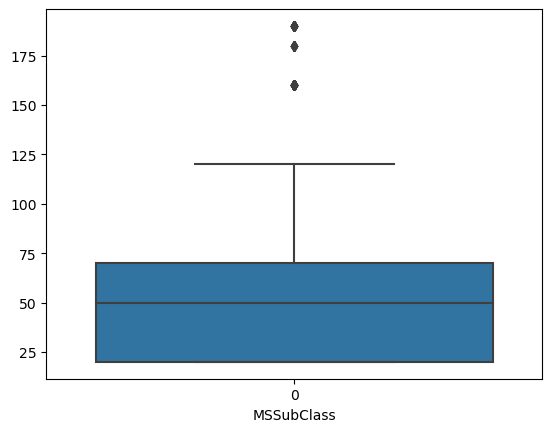

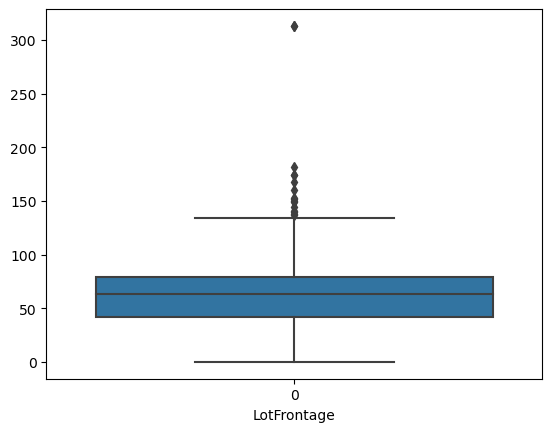

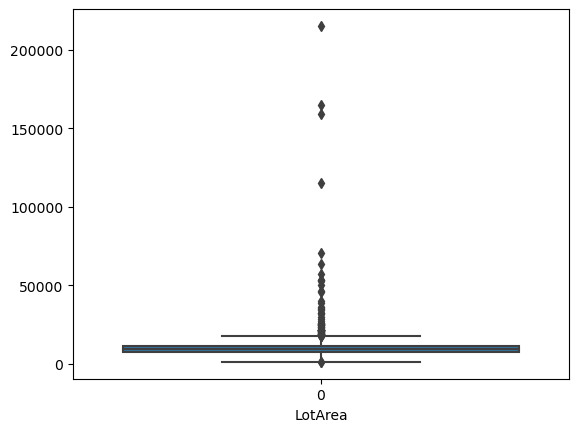

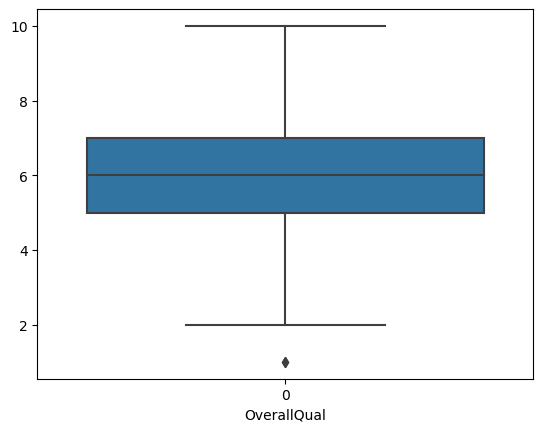

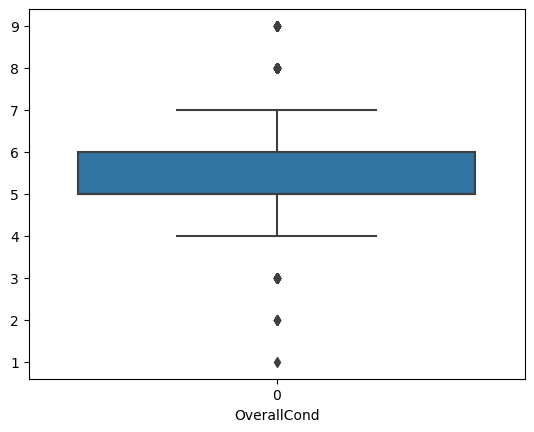

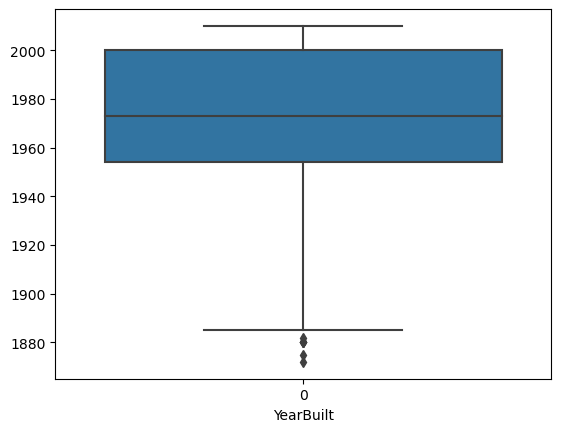

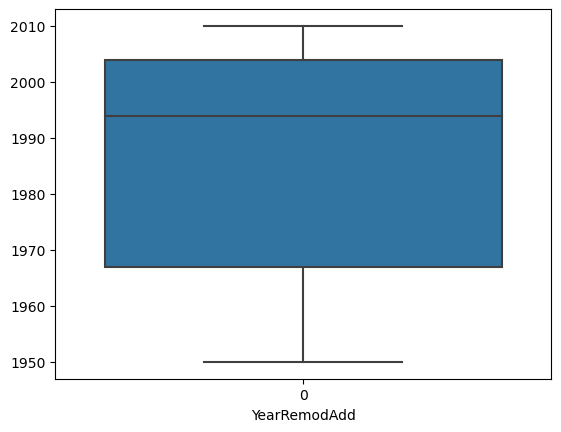

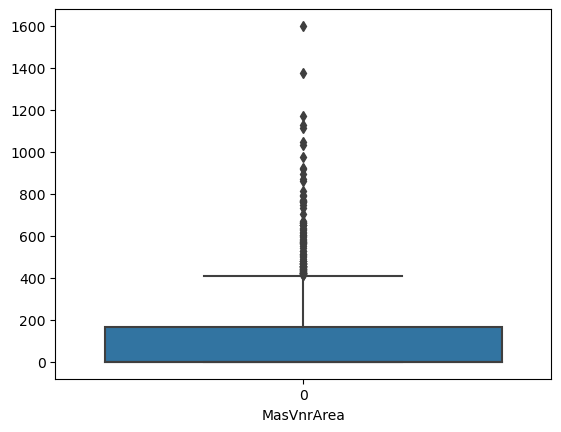

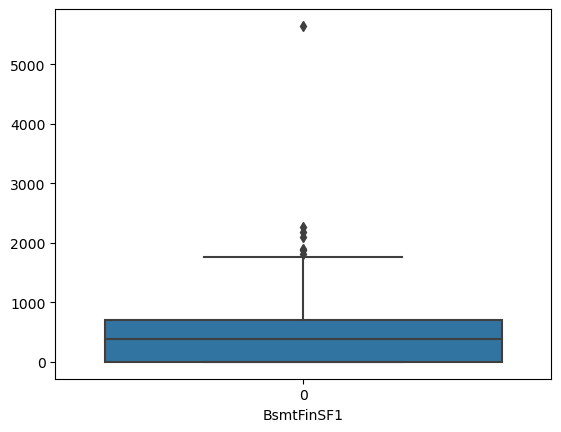

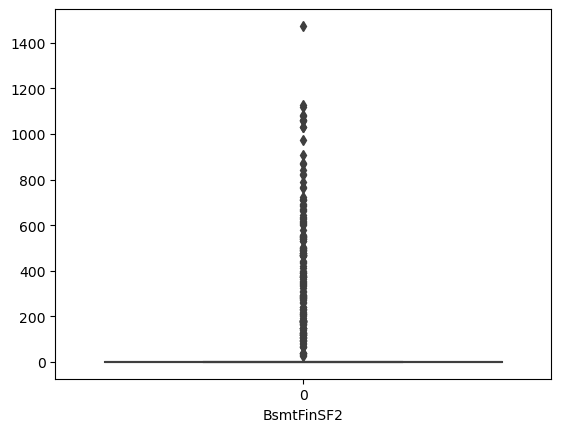

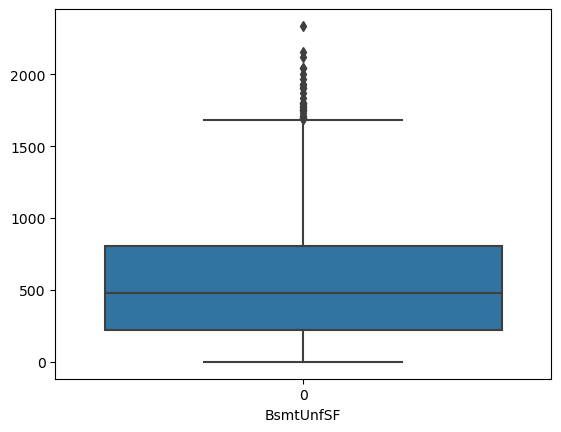

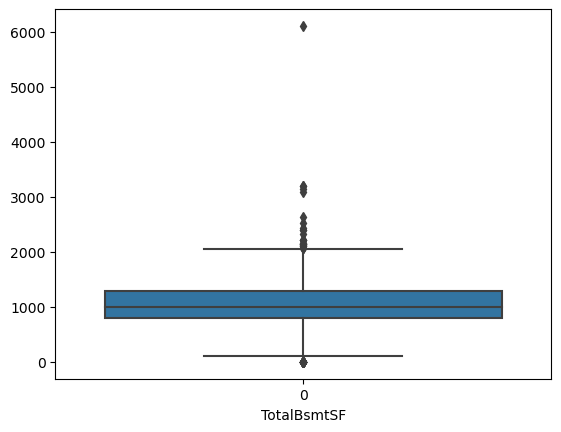

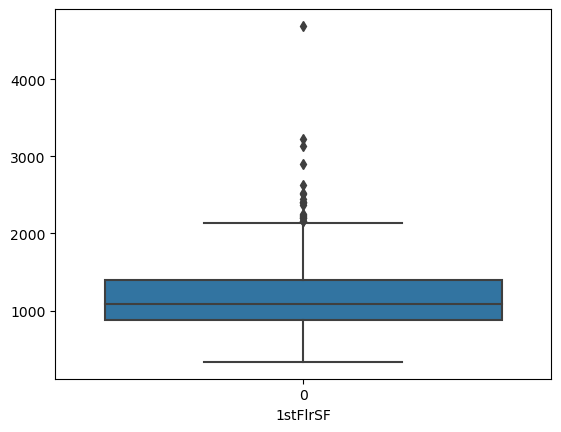

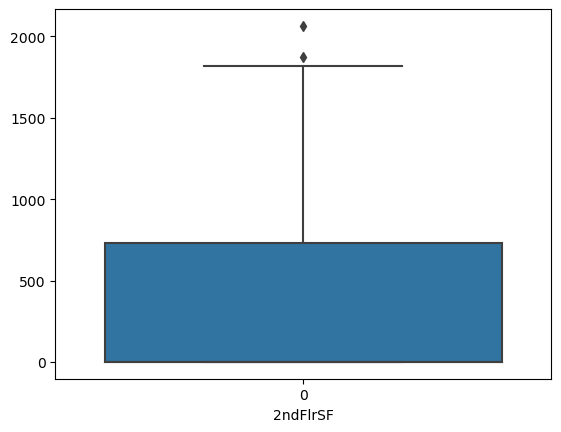

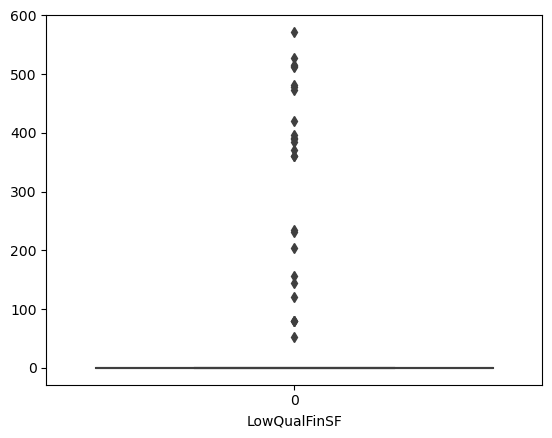

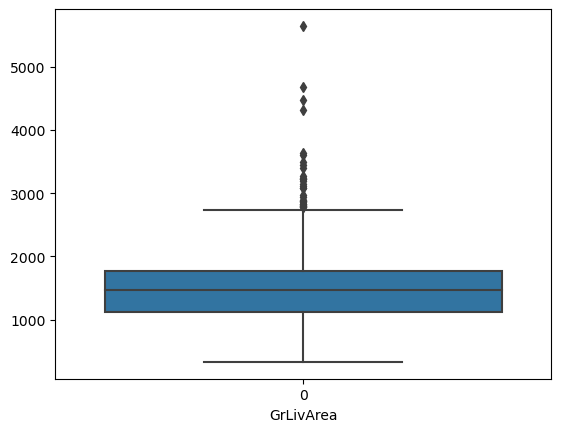

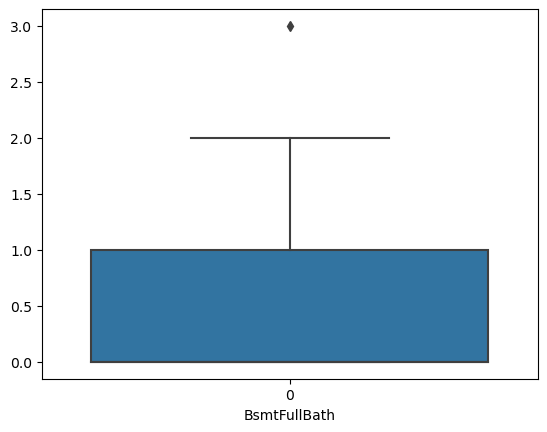

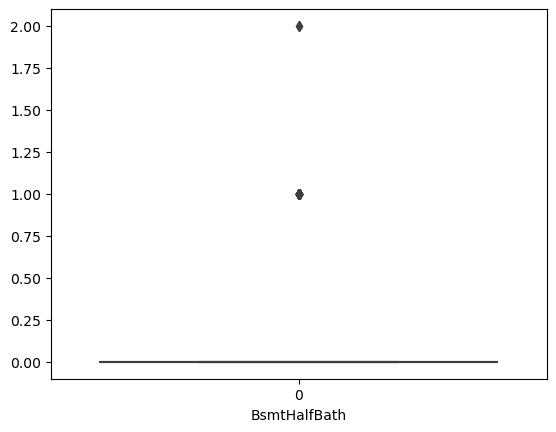

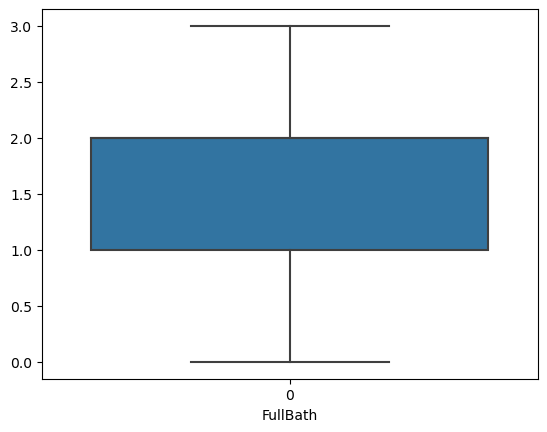

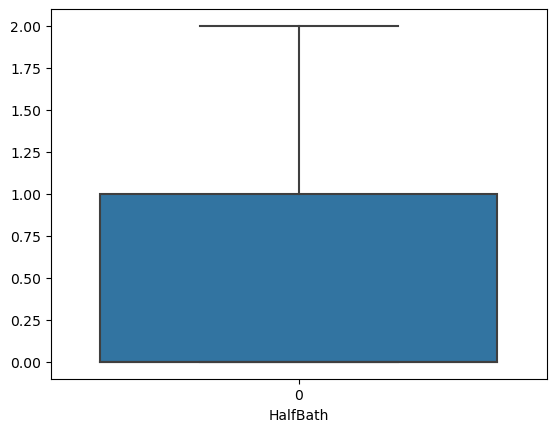

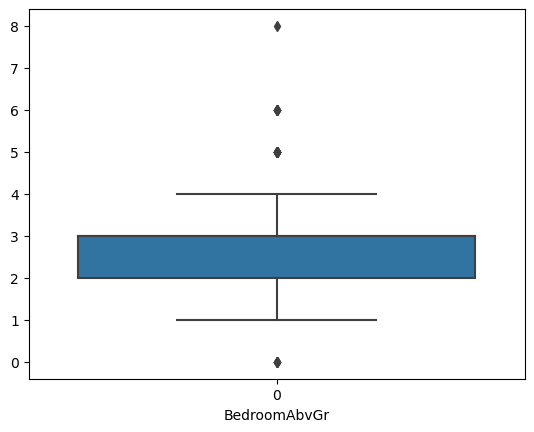

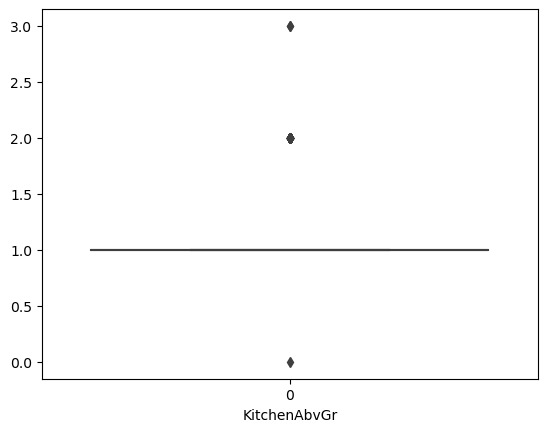

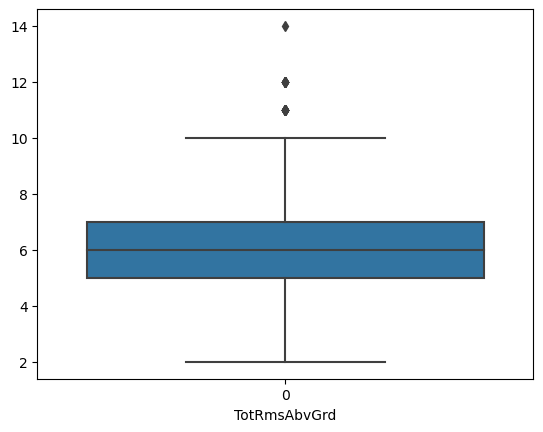

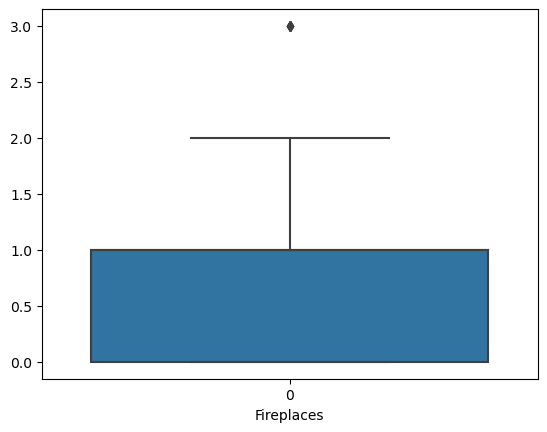

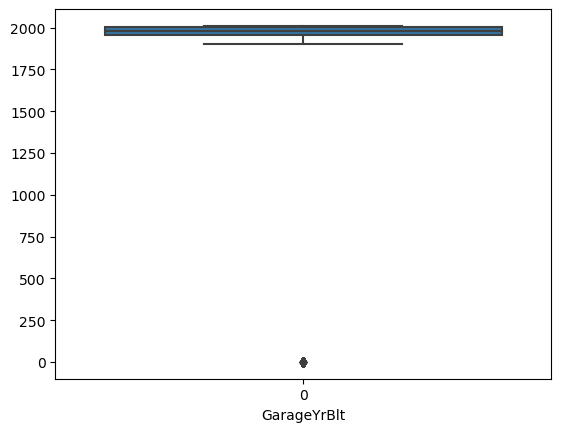

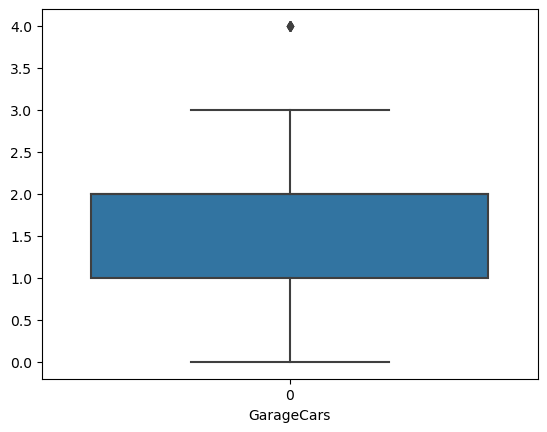

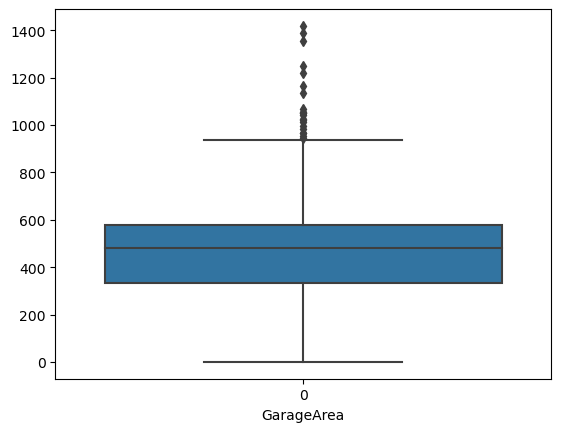

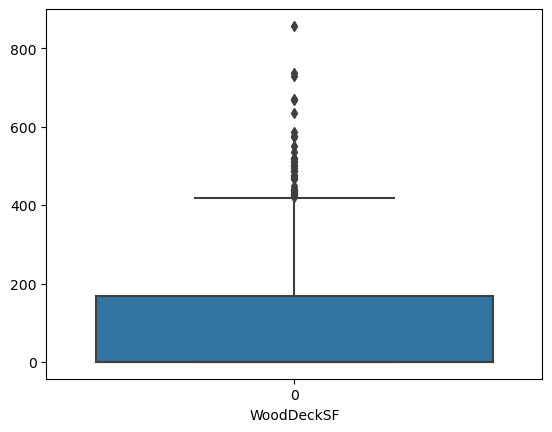

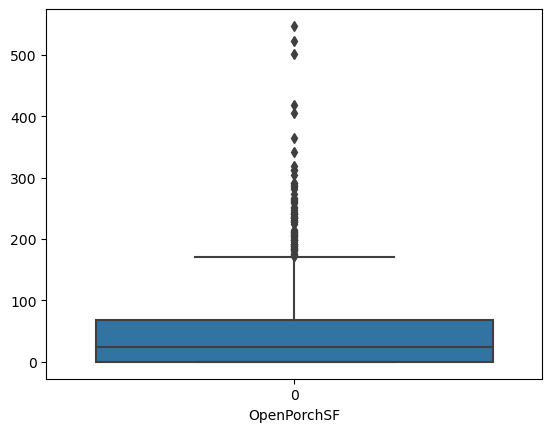

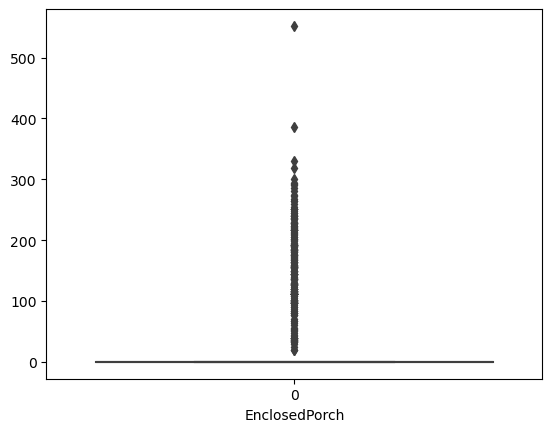

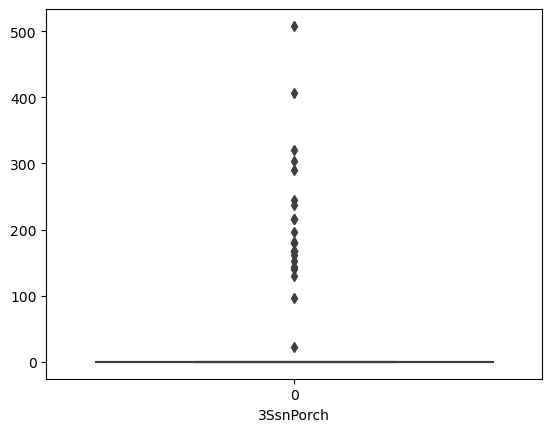

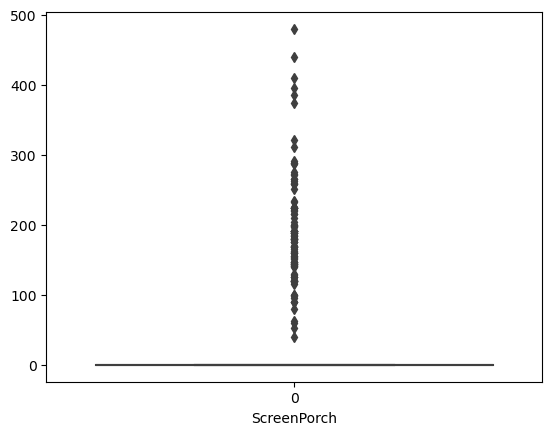

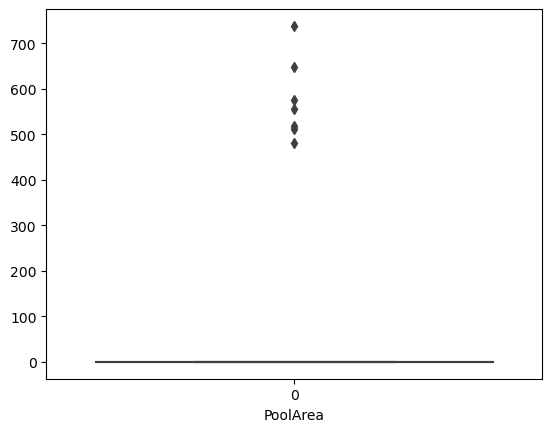

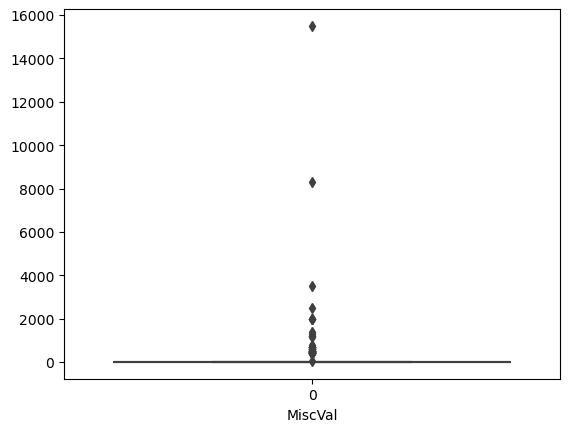

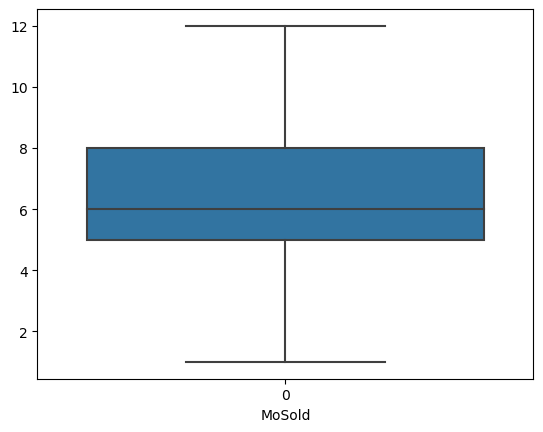

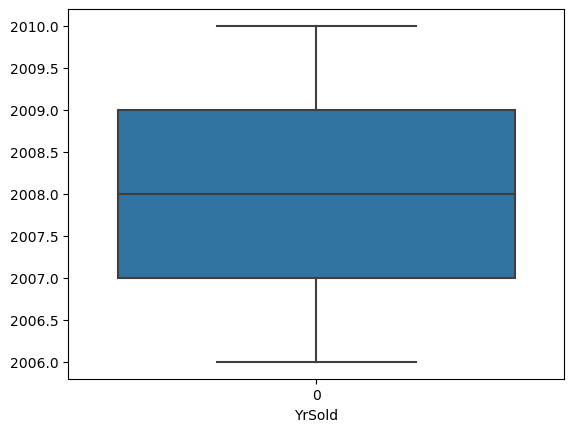

In [35]:
for col in num:
    sns.boxplot(data[col])
    plt.xlabel(col)
    plt.show()

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int32  
 5   LotShape       1460 non-null   int32  
 6   LandContour    1460 non-null   int32  
 7   Utilities      1460 non-null   int32  
 8   LotConfig      1460 non-null   int32  
 9   LandSlope      1460 non-null   int32  
 10  Neighborhood   1460 non-null   int32  
 11  Condition1     1460 non-null   int32  
 12  Condition2     1460 non-null   int32  
 13  BldgType       1460 non-null   int32  
 14  HouseStyle     1460 non-null   int32  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [37]:
out_list = ['LotArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','GrLivArea']

for i in out_list:
    Q1 = data[i].quantile(0.25)
        
    Q3 = data[i].quantile(0.75)
        
    
    IQR = Q3-Q1
    data = data[(data[i]>Q1-1.5*IQR) & (data[i]<Q3+1.5*IQR)]

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1295 non-null   int64  
 1   MSZoning       1295 non-null   int32  
 2   LotFrontage    1295 non-null   float64
 3   LotArea        1295 non-null   int64  
 4   Street         1295 non-null   int32  
 5   LotShape       1295 non-null   int32  
 6   LandContour    1295 non-null   int32  
 7   Utilities      1295 non-null   int32  
 8   LotConfig      1295 non-null   int32  
 9   LandSlope      1295 non-null   int32  
 10  Neighborhood   1295 non-null   int32  
 11  Condition1     1295 non-null   int32  
 12  Condition2     1295 non-null   int32  
 13  BldgType       1295 non-null   int32  
 14  HouseStyle     1295 non-null   int32  
 15  OverallQual    1295 non-null   int64  
 16  OverallCond    1295 non-null   int64  
 17  YearBuilt      1295 non-null   int64  
 18  YearRemo

# PCA using all components

In [39]:
X_input = data.iloc[:,:-1]
Y_input = data.iloc[:,-1]

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_input)

In [41]:
pd.DataFrame(X_scaled)

0         1         2         3         4         5         6   \
0     0.060269 -0.042236  0.270947 -0.210225  0.048187  0.731126  0.286582   
1    -0.877249 -0.042236  0.746775  0.154553  0.048187  0.731126  0.286582   
2     0.060269 -0.042236  0.366112  0.677931  0.048187 -1.399725  0.286582   
3     0.294648 -0.042236  0.112337  0.138693  0.048187 -1.399725  0.286582   
4     0.060269 -0.042236  0.873663  1.632699  0.048187 -1.399725  0.286582   
...        ...       ...       ...       ...       ...       ...       ...   
1290 -0.877249 -3.080908  0.175781 -0.511564  0.048187  0.731126  0.286582   
1291  0.060269 -0.042236  0.175781 -0.379292  0.048187  0.731126  0.286582   
1292  0.294648 -0.042236  0.302669 -0.022444  0.048187  0.731126  0.286582   
1293 -0.877249 -0.042236  0.366112  0.191665  0.048187  0.731126  0.286582   
1294 -0.877249 -0.042236  0.588166  0.261449  0.048187  0.731126  0.286582   

            7         8         9   ...        65        66        67  \
0    -0.027799  0.589889 -0.197465  ...  0.280386 -0.368918 -0.108528   
1    -0.027799 -0.651226 -0.197465  ... -0.722790 -0.368918 -0.108528   
2    -0.027799  0.589889 -0.197465  ... -0.032078 -0.368918 -0.108528   
3    -0.027799 -1.892341 -0.197465  ... -0.147197  4.257370 -0.108528   
4    -0.027799 -0.651226 -0.197465  ...  0.658633 -0.368918 -0.108528   
...        ...       ...       ...  ...       ...       ...       ...   
1290 -0.027799  0.589889 -0.197465  ...  1.135553 -0.368918 -0.108528   
1291 -0.027799  0.589889 -0.197465  ... -0.064969 -0.368918 -0.108528   
1292 -0.027799  0.589889 -0.197465  ...  0.263941 -0.368918 -0.108528   
1293 -0.027799  0.589889 -0.197465  ... -0.722790  1.536024 -0.108528   
1294 -0.027799  0.589889 -0.197465  ...  0.395505 -0.368918 -0.108528   

            68        69        70        71        72        73        74  
0    -0.268771 -0.039261 -0.076089 -1.595344  0.141374  0.308698  0.215153  
1    -0.268771 -0.039261 -0.076089 -0.491727 -0.612040  0.308698  0.215153  
2    -0.268771 -0.039261 -0.076089  0.979761  0.141374  0.308698  0.215153  
3    -0.268771 -0.039261 -0.076089 -1.595344 -1.365455  0.308698 -3.415110  
4    -0.268771 -0.039261 -0.076089  2.083378  0.141374  0.308698  0.215153  
...        ...       ...       ...       ...       ...       ...       ...  
1290 -0.268771 -0.039261 -0.076089  1.347634  0.894789  0.308698  0.215153  
1291 -0.268771 -0.039261 -0.076089  0.611889 -0.612040  0.308698  0.215153  
1292 -0.268771 -0.039261  5.387893 -0.491727  1.648203  0.308698  0.215153  
1293 -0.268771 -0.039261 -0.076089 -0.859599  1.648203  0.308698  0.215153  
1294 -0.268771 -0.039261 -0.076089 -0.123855  0.141374  0.308698  0.215153  

[1295 rows x 75 columns]

In [42]:
cov_matrix = np.cov(X_scaled.T)
eig_val, eig_vec = np.linalg.eig(cov_matrix)
total_eig = sum(eig_val)
var_exp = [(i/total_eig)*100 for i in sorted(eig_val,reverse=True)]
(var_exp)

[13.244705627474925,
 5.76864047298264,
 4.515705699408241,
 4.3019088630790705,
 3.311603977294561,
 2.988854564097899,
 2.382972203090351,
 2.242352633262976,
 2.176645146425111,
 2.1456819836987426,
 2.0444815241725744,
 1.9519572536908967,
 1.8138554076758728,
 1.761236522871725,
 1.7136679525716958,
 1.6465995006602538,
 1.6367094470829555,
 1.5452786223384267,
 1.4858726718784578,
 1.4846137080854491,
 1.4652572086846969,
 1.42676246797836,
 1.3556964453974985,
 1.3497192138578102,
 1.3299624736851816,
 1.3036144053342231,
 1.2790141404197035,
 1.253298985473088,
 1.2447498395111578,
 1.1899642008093883,
 1.1614751249742672,
 1.1576444090595222,
 1.1091838726973453,
 1.0962086144534513,
 1.0654108312784043,
 1.0259842076717687,
 1.0171893922628423,
 0.991602153895456,
 0.9375793434382335,
 0.916388387014386,
 0.8837563949702596,
 0.8582091487618656,
 0.8311973620417676,
 0.8104818280655081,
 0.7770144155278006,
 0.7613058139959186,
 0.7363639447564398,
 0.7207860772285559,
 0.706

In [43]:
cum_var = np.cumsum(var_exp)
pd.DataFrame(cum_var)

0
0    13.244706
1    19.013346
2    23.529052
3    27.830961
4    31.142565
..         ...
70   99.774791
71   99.893938
72  100.000000
73  100.000000
74  100.000000

[75 rows x 1 columns]

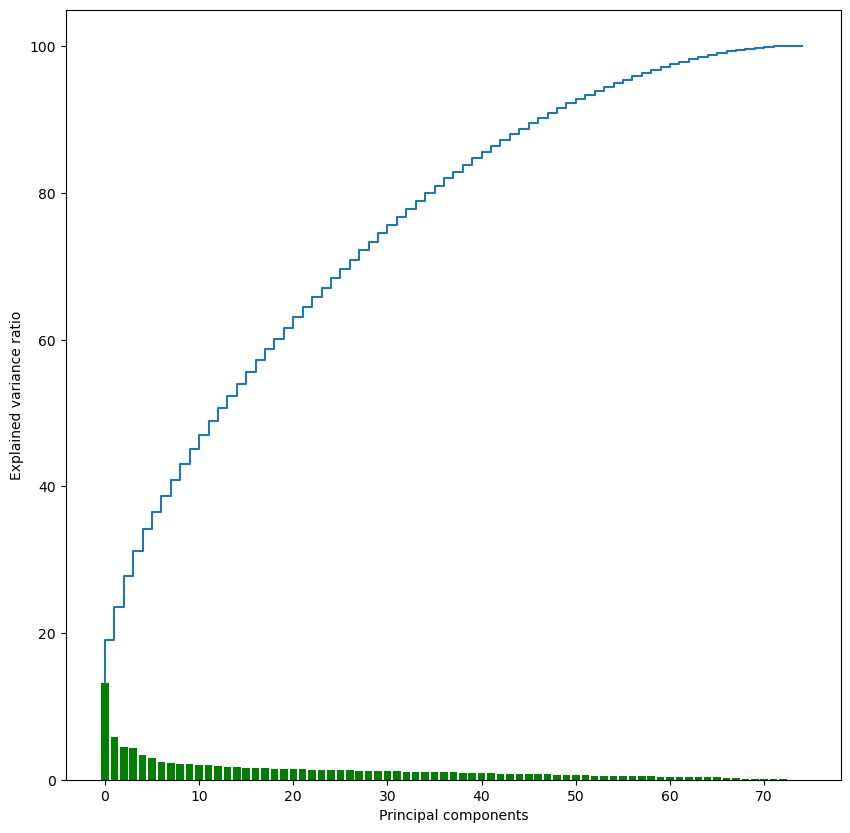

In [44]:
from matplotlib import colors
plt.figure(figsize=(10,10))
plt.bar(range(len(var_exp)),var_exp,label='Indvidual variance explained',color='g')
plt.step(range(len(cum_var)),cum_var,label='Cumulative variance explained')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [45]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(1295, 48)

In [46]:
Y_scaled = scaler.fit_transform(Y_input.values.reshape(-1,1))

In [47]:
Y_input.values.reshape(-1,1)

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]], dtype=int64)

In [48]:
from sklearn.model_selection import train_test_split


In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y_input, test_size=0.2, random_state=30)

In [50]:
from sklearn.tree import DecisionTreeRegressor
rf = DecisionTreeRegressor().fit(X_train,Y_train)
Y_pred = rf.predict(X_test)

In [51]:
from sklearn.metrics import r2_score
r2_score(Y_pred,Y_test)

0.7128354179688627

In [52]:
Y_pred_train = rf.predict(X_train)

In [53]:
r2_score(Y_pred_train,Y_train)

1.0

In [54]:
final_column_list = num_selected + cat_selected

In [55]:
final_column_list

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt',
 'Neighborhood',
 'ExterQual',
 'BsmtQual',
 'KitchenQual',
 'GarageFinish',
 'FireplaceQu',
 'Foundation']

In [56]:
df_final = data[final_column_list]

In [57]:
df_final['SalePrice'] = data['SalePrice']

C:\Users\ZEAL INSTITUTE\AppData\Local\Temp\ipykernel_6208\3473089044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['SalePrice'] = data['SalePrice']


In [58]:
df_final

OverallQual  GrLivArea  GarageCars  TotalBsmtSF  FullBath  YearBuilt  \
0               7       1710           2          856         2       2003   
1               6       1262           2         1262         2       1976   
2               7       1786           2          920         2       2001   
3               7       1717           3          756         1       1915   
4               8       2198           3         1145         2       2000   
...           ...        ...         ...          ...       ...        ...   
1454            7       1221           2         1221         2       2004   
1455            6       1647           2          953         2       1999   
1457            7       2340           1         1152         2       1941   
1458            5       1078           1         1078         1       1950   
1459            5       1256           1         1256         1       1965   

      Neighborhood  ExterQual  BsmtQual  KitchenQual  GarageFinish  \
0                5          2         2            2             2   
1               24          3         2            3             2   
2                5          2         2            2             2   
3                6          3         4            2             3   
4               15          2         2            2             2   
...            ...        ...       ...          ...           ...   
1454            21          2         2            2             2   
1455             8          3         2            3             2   
1457             6          0         4            2             2   
1458            12          3         4            2             3   
1459             7          2         4            3             0   

      FireplaceQu  Foundation  SalePrice  
0               3           2     208500  
1               5           1     181500  
2               5           2     223500  
3               2           0     140000  
4               5           2     250000  
...           ...         ...        ...  
1454            3           2     185000  
1455            5           2     175000  
1457            2           4     266500  
1458            3           1     142125  
1459            3           1     147500  

[1295 rows x 14 columns]

# PCA using selected components

In [59]:
X_input = df_final.iloc[:,:-1]
Y_input = df_final.iloc[:,-1]

In [60]:
X_scaled = scaler.fit_transform(X_input)
cov_matrix = np.cov(X_scaled.T)
eig_val, eig_vec = np.linalg.eig(cov_matrix)
total_eig = sum(eig_val)
var_exp = [(i/total_eig)*100 for i in sorted(eig_val,reverse=True)]
(var_exp)

[42.18641970023023,
 9.54545744739484,
 8.672205897860941,
 6.787202748156485,
 6.208094032830709,
 5.19434370978708,
 4.903664046475212,
 3.6921872473012827,
 3.3673671430268834,
 2.8813175429534894,
 2.701850308562701,
 2.3967905315153333,
 1.4630996439048205]

In [61]:
cum_var = np.cumsum(var_exp)
pd.DataFrame(cum_var)

0
0    42.186420
1    51.731877
2    60.404083
3    67.191286
4    73.399380
5    78.593724
6    83.497388
7    87.189575
8    90.556942
9    93.438260
10   96.140110
11   98.536900
12  100.000000

In [62]:
from sklearn.decomposition import PCA
pca = PCA(0.90)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(1295, 9)

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y_input, test_size=0.2, random_state=30)

In [63]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [64]:
rf = model.fit(X_train,Y_train)
y_pred = rf.predict(X_test)

In [65]:
r2_score(y_pred,Y_test)

0.818576846220628

In [66]:
y_pred1 = rf.predict(X_train)

In [67]:
r2_score(y_pred1,Y_train)

0.9748451546886387

Still the training accuracy is better than testing, seems like model is overfitting

# Cross Validation and Hyper parameter tuning

In [68]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y_input, test_size=0.2, random_state=30)

In [70]:
param_grid = {
    
    
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
   
    

}

In [71]:
#import pdb
#pdb.set_trace()
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,n_jobs=1,scoring='neg_mean_absolute_error')
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_absolute_error')

In [72]:
best_params = grid_search.best_params_

In [73]:
print(best_params)

{'max_depth': 20, 'min_samples_leaf': 4, 'n_estimators': 100}


In [74]:
best_model = grid_search.best_estimator_

In [75]:
best_model.fit(X_train,Y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=4)

In [76]:
Y_pred = best_model.predict(X_test)

In [77]:
from sklearn.metrics import r2_score

In [78]:
r2_score(Y_pred,Y_test)

0.8118175073303919

In [79]:
Y_pred1 = best_model.predict(X_train)

In [80]:
r2_score(Y_pred1,Y_train)

0.9325046613447746

Still nothing better so we will have to consider the model and see the outcome

In [81]:
Y_pred

array([156597.62077228, 104573.54144483, 111125.99970388, 161205.93140215,
       225027.99794733, 149760.90497808, 122357.31229207, 300412.45832471,
       141521.30076812, 188373.97348454, 179293.6362825 , 172304.88810845,
       231199.58216539, 158447.10523088, 260634.01280214, 143770.2236945 ,
       222722.86813992, 140214.45055819, 127905.00607212, 278362.56636583,
       144320.11536103, 248461.86681552, 242905.48360537, 136454.92708833,
       125586.69379654, 212087.21614258, 227623.45654581, 246082.55101865,
       119737.30079562, 185286.86768044, 190009.2632212 , 161843.68228938,
       137506.42166125, 100039.39278982, 221009.35293048, 130246.92813029,
       158491.02676074, 133379.5749899 , 143828.72526401,  67664.90137945,
       158327.83007915,  99159.61456607, 100329.03033788, 129839.39193196,
       112399.0055977 , 161685.7473693 , 180525.29673737, 205145.67832658,
       100891.88751515, 147061.34213786, 248887.65308808, 130505.61422408,
       100715.22799229, 2

In [82]:
df_test= pd.read_csv("C:/Users/ZEAL INSTITUTE/Desktop/AI and Data Science/PYTHON/Kaggle Machine Learning Case studies/home-data-for-ml-course/test.csv")

In [83]:
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [84]:
data_test = df_test[final_column_list]

In [85]:
data_test

OverallQual  GrLivArea  GarageCars  TotalBsmtSF  FullBath  YearBuilt  \
0               5        896         1.0        882.0         1       1961   
1               6       1329         1.0       1329.0         1       1958   
2               5       1629         2.0        928.0         2       1997   
3               6       1604         2.0        926.0         2       1998   
4               8       1280         2.0       1280.0         2       1992   
...           ...        ...         ...          ...       ...        ...   
1454            4       1092         0.0        546.0         1       1970   
1455            4       1092         1.0        546.0         1       1970   
1456            5       1224         2.0       1224.0         1       1960   
1457            5        970         0.0        912.0         1       1992   
1458            7       2000         3.0        996.0         2       1993   

     Neighborhood ExterQual BsmtQual KitchenQual GarageFinish FireplaceQu  \
0           NAmes        TA       TA          TA          Unf         NaN   
1           NAmes        TA       TA          Gd          Unf         NaN   
2         Gilbert        TA       Gd          TA          Fin          TA   
3         Gilbert        TA       TA          Gd          Fin          Gd   
4         StoneBr        Gd       Gd          Gd          RFn         NaN   
...           ...       ...      ...         ...          ...         ...   
1454      MeadowV        TA       TA          TA          NaN         NaN   
1455      MeadowV        TA       TA          TA          Unf         NaN   
1456      Mitchel        TA       TA          TA          Unf          TA   
1457      Mitchel        TA       Gd          TA          NaN         NaN   
1458      Mitchel        TA       Gd          TA          Fin          TA   

     Foundation  
0        CBlock  
1        CBlock  
2         PConc  
3         PConc  
4         PConc  
...         ...  
1454     CBlock  
1455     CBlock  
1456     CBlock  
1457      PConc  
1458      PConc  

[1459 rows x 13 columns]

In [86]:
for col in data_test.columns:
    if data_test[col].dtype == 'object':
        data_test[col] = data_test[col].fillna('None')
    else:
        data_test[col] = data_test[col].fillna(0)
    

C:\Users\ZEAL INSTITUTE\AppData\Local\Temp\ipykernel_30848\645284357.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[col] = data_test[col].fillna(0)
C:\Users\ZEAL INSTITUTE\AppData\Local\Temp\ipykernel_30848\645284357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[col] = data_test[col].fillna('None')


In [87]:
data_test

OverallQual  GrLivArea  GarageCars  TotalBsmtSF  FullBath  YearBuilt  \
0               5        896         1.0        882.0         1       1961   
1               6       1329         1.0       1329.0         1       1958   
2               5       1629         2.0        928.0         2       1997   
3               6       1604         2.0        926.0         2       1998   
4               8       1280         2.0       1280.0         2       1992   
...           ...        ...         ...          ...       ...        ...   
1454            4       1092         0.0        546.0         1       1970   
1455            4       1092         1.0        546.0         1       1970   
1456            5       1224         2.0       1224.0         1       1960   
1457            5        970         0.0        912.0         1       1992   
1458            7       2000         3.0        996.0         2       1993   

     Neighborhood ExterQual BsmtQual KitchenQual GarageFinish FireplaceQu  \
0           NAmes        TA       TA          TA          Unf        None   
1           NAmes        TA       TA          Gd          Unf        None   
2         Gilbert        TA       Gd          TA          Fin          TA   
3         Gilbert        TA       TA          Gd          Fin          Gd   
4         StoneBr        Gd       Gd          Gd          RFn        None   
...           ...       ...      ...         ...          ...         ...   
1454      MeadowV        TA       TA          TA         None        None   
1455      MeadowV        TA       TA          TA          Unf        None   
1456      Mitchel        TA       TA          TA          Unf          TA   
1457      Mitchel        TA       Gd          TA         None        None   
1458      Mitchel        TA       Gd          TA          Fin          TA   

     Foundation  
0        CBlock  
1        CBlock  
2         PConc  
3         PConc  
4         PConc  
...         ...  
1454     CBlock  
1455     CBlock  
1456     CBlock  
1457      PConc  
1458      PConc  

[1459 rows x 13 columns]

In [88]:
data_test.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
FullBath        0
YearBuilt       0
Neighborhood    0
ExterQual       0
BsmtQual        0
KitchenQual     0
GarageFinish    0
FireplaceQu     0
Foundation      0
dtype: int64

In [89]:
le = LabelEncoder()
for c in cat_selected:
    data_test[c] = le.fit_transform(data_test[c])

C:\Users\ZEAL INSTITUTE\AppData\Local\Temp\ipykernel_30848\1813316778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[c] = le.fit_transform(data_test[c])
C:\Users\ZEAL INSTITUTE\AppData\Local\Temp\ipykernel_30848\1813316778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[c] = le.fit_transform(data_test[c])
C:\Users\ZEAL INSTITUTE\AppData\Local\Temp\ipykernel_30848\1813316778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [90]:
data_test

OverallQual  GrLivArea  GarageCars  TotalBsmtSF  FullBath  YearBuilt  \
0               5        896         1.0        882.0         1       1961   
1               6       1329         1.0       1329.0         1       1958   
2               5       1629         2.0        928.0         2       1997   
3               6       1604         2.0        926.0         2       1998   
4               8       1280         2.0       1280.0         2       1992   
...           ...        ...         ...          ...       ...        ...   
1454            4       1092         0.0        546.0         1       1970   
1455            4       1092         1.0        546.0         1       1970   
1456            5       1224         2.0       1224.0         1       1960   
1457            5        970         0.0        912.0         1       1992   
1458            7       2000         3.0        996.0         2       1993   

      Neighborhood  ExterQual  BsmtQual  KitchenQual  GarageFinish  \
0               12          3         4            4             3   
1               12          3         4            2             3   
2                8          3         2            4             0   
3                8          3         4            2             0   
4               22          2         2            2             2   
...            ...        ...       ...          ...           ...   
1454            10          3         4            4             1   
1455            10          3         4            4             3   
1456            11          3         4            4             3   
1457            11          3         2            4             1   
1458            11          3         2            4             0   

      FireplaceQu  Foundation  
0               3           1  
1               3           1  
2               5           2  
3               2           2  
4               3           2  
...           ...         ...  
1454            3           1  
1455            3           1  
1456            5           1  
1457            3           2  
1458            5           2  

[1459 rows x 13 columns]

In [91]:
X_scaled_test = scaler.fit_transform(data_test)

In [92]:
X_scaled_test.shape

(1459, 13)

In [93]:
pca = PCA(0.90)
X_pca_test = pca.fit_transform(X_scaled_test)
X_pca_test.shape

(1459, 9)

In [94]:
X_pca_test

array([[-2.5962848 ,  0.23340999, -0.40839232, ..., -0.25397372,
         0.37947739,  0.07967721],
       [-1.3862606 ,  0.9435874 ,  0.09553233, ...,  0.03870981,
         1.0636271 , -0.48284719],
       [ 0.42154543, -2.91248436,  0.17310664, ..., -0.77939003,
        -0.36460022,  0.37780101],
       ...,
       [-1.94260015, -0.76936839,  1.06245878, ..., -0.25380584,
        -0.02671022, -0.31839299],
       [-1.35818412, -1.0139426 , -2.134795  , ..., -1.01281083,
         0.81172934,  0.90551422],
       [ 1.57780423, -2.58642383,  1.14332866, ..., -0.88133014,
        -1.05620069, -0.45580815]])

In [95]:
SalesPrice = best_model.predict(X_pca_test)

In [98]:
SalesPrice

array([118805.97831036, 152304.57314352, 158541.37006674, ...,
       139842.52203063, 127571.18317871, 198232.58399895])

In [102]:
df = pd.DataFrame(SalesPrice)

In [103]:
file_path = "C:/Users/ZEAL INSTITUTE/Desktop/AI and Data Science/PYTHON/Kaggle Machine Learning Case studies/home-data-for-ml-course/sample_submission.csv"

In [104]:
df.to_csv(file_path,index=False,header=['SalePrice'] )

# Deep learning model

In [513]:
from keras import models
from keras.layers import Dense, Dropout
from keras import callbacks
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD


In [514]:
# Defining the model architecture

model = models.Sequential()
model.add(Dense(units=54,activation='relu',input_dim=X_train.shape[1],kernel_initializer='he_normal'))
model.add(Dropout(.5))
model.add(Dense(units=27,activation='relu',kernel_initializer='normal'))
#model.add(Dropout(.5))
model.add(Dense(units=27,activation='relu',kernel_initializer='normal'))
#model.add(Dropout(.5))
model.add(Dense(units=27,activation='relu',kernel_initializer='normal'))
#model.add(Dropout(.5))
model.add(Dense(units=27,activation='relu',kernel_initializer='normal'))
#model.add(Dropout(.5))
model.add(Dense(units=27,activation='relu',kernel_initializer='normal'))
model.add(Dense(units=27,activation='relu',kernel_initializer='normal'))
model.add(Dense(units=27,activation='relu',kernel_initializer='normal'))
model.add(Dense(units=27,activation='relu',kernel_initializer='normal'))

#model.add(Dropout(.5))
model.add(Dense(units=1,activation='linear',kernel_initializer='normal'))

In [515]:
model.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_430 (Dense)           (None, 54)                540       
                                                                 
 dropout_67 (Dropout)        (None, 54)                0         
                                                                 
 dense_431 (Dense)           (None, 27)                1485      
                                                                 
 dense_432 (Dense)           (None, 27)                756       
                                                                 
 dense_433 (Dense)           (None, 27)                756       
                                                                 
 dense_434 (Dense)           (None, 27)                756       
                                                                 
 dense_435 (Dense)           (None, 27)              

In [516]:
#Optimization


model.compile(Adam(lr=0.1),loss='mse')

In [517]:
es = EarlyStopping(monitor='val_loss',min_delta=0,patience=20,mode='min',restore_best_weights=True)

In [518]:
#Model fitting
history = model.fit(X_train,Y_train,validation_split=0.20,batch_size=60,epochs=175,shuffle=True,verbose=1,callbacks=[es])

Epoch 1/175
14/14 [==============================] - 2s 21ms/step - loss: 33470869504.0000 - val_loss: 32964509696.0000
Epoch 2/175
14/14 [==============================] - 0s 8ms/step - loss: 33470859264.0000 - val_loss: 32964497408.0000
Epoch 3/175
14/14 [==============================] - 0s 8ms/step - loss: 33470834688.0000 - val_loss: 32964452352.0000
Epoch 4/175
14/14 [==============================] - 0s 8ms/step - loss: 33470683136.0000 - val_loss: 32963975168.0000
Epoch 5/175
14/14 [==============================] - 0s 9ms/step - loss: 33468575744.0000 - val_loss: 32957575168.0000
Epoch 6/175
14/14 [==============================] - 0s 10ms/step - loss: 33445169152.0000 - val_loss: 32892395520.0000
Epoch 7/175
14/14 [==============================] - 0s 8ms/step - loss: 33241579520.0000 - val_loss: 32396541952.0000
Epoch 8/175
14/14 [==============================] - 0s 9ms/step - loss: 31945224192.0000 - val_loss: 29502418944.0000
Epoch 9/175
14/14 [===========================

14/14 [==============================] - 0s 7ms/step - loss: 1647898240.0000 - val_loss: 1064832576.0000
Epoch 140/175
14/14 [==============================] - 0s 9ms/step - loss: 1525274112.0000 - val_loss: 1092672768.0000
Epoch 141/175
14/14 [==============================] - 0s 8ms/step - loss: 1498009088.0000 - val_loss: 1060485504.0000
Epoch 142/175
14/14 [==============================] - 0s 7ms/step - loss: 1571742080.0000 - val_loss: 1067207424.0000
Epoch 143/175
14/14 [==============================] - 0s 8ms/step - loss: 1439025536.0000 - val_loss: 1081440128.0000
Epoch 144/175
14/14 [==============================] - 0s 8ms/step - loss: 1499178880.0000 - val_loss: 1067318720.0000
Epoch 145/175
14/14 [==============================] - 0s 7ms/step - loss: 1649415936.0000 - val_loss: 1064230464.0000
Epoch 146/175
14/14 [==============================] - 0s 9ms/step - loss: 1417288832.0000 - val_loss: 1083363200.0000
Epoch 147/175
14/14 [==============================] - 0s 8ms/

In [519]:
Y_pred1 = model.predict(X_test)

9/9 [==============================] - 0s 3ms/step


In [520]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred1)


0.8122324753975572